# **Checkpoint 3**

## **Importación de bibliotecas y datasets de entrenamiento y evaluación.**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
import joblib

### **Dataset de entrenamiento**

Nuevamente importaremos el dataframe obtenido tras finalizar el Checkpoint 1:

In [2]:
df_chp1 = pd.read_csv('https://raw.githubusercontent.com/AlanBotoshansky/7506R-1C2023-GRUPO14/main/TP1/Datasets/dataset_chp1.csv')
df = df_chp1.copy()
df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,No Deposit,9,Undefined,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,Yes
1,Resort Hotel,4,2015,October,44,31,0,1,2,0,...,No Deposit,Undefined,Undefined,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,No
2,City Hotel,25,2016,October,42,13,0,1,2,2,...,No Deposit,9,Undefined,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,No
3,City Hotel,26,2016,December,51,12,2,5,2,0,...,Non Refund,154,Undefined,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,Yes
4,City Hotel,104,2017,March,12,19,2,5,2,0,...,No Deposit,20,Undefined,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0,...,No Deposit,240,Undefined,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,Yes
61909,City Hotel,0,2016,September,36,2,0,1,1,0,...,No Deposit,Undefined,Undefined,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,No
61910,City Hotel,10,2017,May,19,8,1,2,1,0,...,No Deposit,Undefined,153,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,No
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0,...,Non Refund,96,Undefined,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,Yes


Los tipos de dato de las variables actuales son los siguientes:

In [3]:
df.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                              object
company                           

### **Dataset de evaluación**

Importamos el dataset de test sobre el cual hay que predecir la variable target.

In [4]:
df_test_default = pd.read_csv('https://raw.githubusercontent.com/AlanBotoshansky/7506R-1C2023-GRUPO14/main/TP1/Datasets/hotels_test.csv')
df_test = df_test_default.copy()
df_test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,Non Refund,NaN,NaN,0,Transient,100.00,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,286,2016,May,20,11,0,4,2,0.0,...,No Deposit,30.0,NaN,176,Transient-Party,101.00,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,0,2016,August,35,23,0,1,3,0.0,...,No Deposit,NaN,NaN,0,Transient,225.00,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad
3,Resort Hotel,196,2016,October,44,29,2,5,2,2.0,...,No Deposit,240.0,NaN,0,Transient,96.00,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c
4,Resort Hotel,232,2016,November,48,26,2,1,2,0.0,...,Non Refund,11.0,NaN,0,Transient,30.00,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26530,City Hotel,31,2017,April,16,21,2,3,2,0.0,...,No Deposit,21.0,NaN,0,Transient-Party,85.00,0,0,2017-04-26,636ccded-66ad-4538-8006-c0b9f84c6256
26531,City Hotel,130,2016,September,36,3,2,1,2,0.0,...,No Deposit,42.0,NaN,0,Transient,80.75,0,0,2016-09-06,11e19741-bd28-4459-8ea3-184f1664000f
26532,Resort Hotel,45,2016,August,35,22,1,1,2,0.0,...,No Deposit,240.0,NaN,0,Transient,231.00,0,0,2016-08-04,36a4c7b0-d6b1-4528-93db-311be96ec1c6
26533,City Hotel,164,2017,August,32,10,2,4,2,0.0,...,No Deposit,85.0,NaN,0,Transient,80.10,0,0,2017-03-07,89c85fa5-2b3d-4131-844c-e151a65ca240


In [5]:
df_test.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

## **Preprocesamiento y transformación de los datasets**

### **Preprocesamiento**

Volvemos a asignarle valores númericos a las variables del dataset de entrenamiento que, por una cuestión de claridad, le habíamos asignado un valor categórico.

In [6]:
cols_to_replace = ['is_repeated_guest', 'is_canceled']
df[cols_to_replace] = df[cols_to_replace].replace({'Yes': 1, 'No': 0})

Modificaremos el dataset de test con los mismos criterios aplicados al dataset de entrenamiento. Primero, eliminaremos la variable "reservation_status_date".

In [7]:
df_test = df_test.drop('reservation_status_date', axis=1)

Trataremos los datos nulos de igual manera que los tratamos con el dataset de entrenamiento

In [8]:
serie_porcentaje_nulos = df_test.isna().sum()/len(df)
serie_porcentaje_nulos = serie_porcentaje_nulos[serie_porcentaje_nulos > 0]
serie_porcentaje_nulos

country    0.001534
agent      0.054318
company    0.407313
dtype: float64

In [9]:
df_test.fillna(value={'country': 'Undefined', 'company': 0, 'agent': 0}, inplace=True)

cols_float_to_int = ['agent', 'company']
df_test[cols_float_to_int] = df_test[cols_float_to_int].astype(int)

cols_to_str = ['agent', 'company']
df_test[cols_to_str] = df_test[cols_to_str].replace({0: 'Undefined'})
df_test[cols_to_str] = df_test[cols_to_str].astype(str)

In [10]:
serie_porcentaje_nulos = df_test.isna().sum()/len(df)
serie_porcentaje_nulos = serie_porcentaje_nulos[serie_porcentaje_nulos > 0]
serie_porcentaje_nulos

Series([], dtype: float64)

### **Dataframe "completo"**

Por otro lado, este dataframe contendrá toda la información disponble.

In [11]:
df_train_completo = df.copy()

columna_a_eliminar = ['id']
df_train_completo.drop(columna_a_eliminar, axis='columns', inplace=True)

In [12]:
target = 'is_canceled'
features = df_train_completo.columns.tolist()
features.remove(target)

Ahora haremos One Hot Encoding para todas las variables cualitativas de nuestro dataframe para no perder nada de información.

In [13]:
df_train_completo = pd.get_dummies(df_train_completo, columns=df[features].select_dtypes('object').columns.tolist())

In [14]:
#Creamos un dataframe con los features que vamos a usar para clasificar
features_para_clasificar = df_train_completo.columns.tolist()
features_para_clasificar.remove(target)
df_train_completo_x = df_train_completo[features_para_clasificar]

#Creamos un dataframe con la variable target
df_train_completo_y = df_train_completo[target].copy()

Nos aseguraremos de que ambos datasets tengan las mismas variables, de modo que no exista alguna que este presente en un dataframe y ausente en el otro, quedándonos asi con las variables dummies de los dataset de entrenamiento y test que pertenezcan a ambos.

Hacemos One Hot Encoding para todas las variables cualitativas de nuestro dataframe de evaluación.

In [15]:
df_test_completo = df_test.copy()

columna_a_eliminar = ['id']
df_test_completo.drop(columna_a_eliminar, axis='columns', inplace=True)

features = df_test_completo.columns.tolist()

df_test_completo = pd.get_dummies(df_test_completo, columns=df_test_completo[features].select_dtypes('object').columns.tolist())

Ahora nos quedamos con las variables que tienen en común los dataset de entrenamiento y test.

In [16]:
cols_df_train_completo_x = set(df_train_completo_x.columns)
cols_df_test_completo = set(df_test_completo.columns)

cols_solo_train = cols_df_train_completo_x.difference(cols_df_test_completo)
cols_solo_test = cols_df_test_completo.difference(cols_df_train_completo_x)

columnas_a_eliminar_de_train = list(cols_solo_train)
df_train_completo_x.drop(columnas_a_eliminar_de_train, axis='columns', inplace=True)

columnas_a_eliminar_de_test = list(cols_solo_test)
df_test_completo.drop(columnas_a_eliminar_de_test, axis='columns', inplace=True)

<ipython-input-16-af243c21312f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_completo_x.drop(columnas_a_eliminar_de_train, axis='columns', inplace=True)


Finalmente, hacemos una partición (proporción de 80/20) del dataframe de entrenamiento, para poder validar el rendimiento de nuestros modelos luego de entrenarlos.

In [17]:
x_train, x_val, y_train, y_val = train_test_split(df_train_completo_x, df_train_completo_y, test_size=0.2, random_state=0, stratify=df[target].values)

## **Funciones auxiliares**

In [18]:
def imprimir_f1_score(y_test, y_pred):
  f1 = f1_score(y_test, y_pred, average='weighted')
  print("F1 score:", f1)

In [19]:
def grafico_matriz_confusion(y_test, y_pred):
  tabla = confusion_matrix(y_test, y_pred)
  sns.heatmap(tabla, cmap='crest', annot=True, fmt='g')
  plt.xlabel('Predicho')
  plt.ylabel('Real')
  plt.show()

In [20]:
def predecir_y_exportar_a_csv_con_knn(knn, x_test, f1_score_en_train):
    y_pred = knn.predict(x_test)

    df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})

    params = knn.get_params()
    n_neighbors = params['n_neighbors']
    weights = params['weights']
    algorithm = params['algorithm']
    metric = params['metric']

    df_submission.to_csv(f"pred_KNN-nn_{n_neighbors}-w_{weights}-algo_{algorithm}-met_{metric}-f1_{round(f1_score_en_train, 4)}.csv", index=False)

In [21]:
def exportar_knn(knn, f1_score_en_train):
    params = knn.get_params()
    n_neighbors = params['n_neighbors']
    weights = params['weights']
    algorithm = params['algorithm']
    metric = params['metric']
    
    joblib.dump(knn, f'KNN-nn_{n_neighbors}-w_{weights}-algo_{algorithm}-met_{metric}-f1_{round(f1_score_en_train, 4)}.joblib')

In [22]:
def predecir_y_exportar_a_csv_con_svm_lineal(svm_lin, x_test, f1_score_en_train):
    y_pred = svm_lin.predict(x_test)

    df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})

    params = svm_lin.get_params()
    kernel = params['svm__kernel']
    C = params['svm__C']

    df_submission.to_csv(f"pred_SVM_lin-ker_{kernel}-C_{round(C, 4)}-f1_{round(f1_score_en_train, 4)}.csv", index=False)

In [23]:
def exportar_svm_lineal(svm_lin, f1_score_en_train):
    params = svm_lin.get_params()
    kernel = params['svm__kernel']
    C = params['svm__C']
    
    joblib.dump(svm_lin, f'SVM_lin-ker_{kernel}-C_{round(C, 4)}-f1_{round(f1_score_en_train, 4)}.joblib')

In [24]:
def predecir_y_exportar_a_csv_con_svm_polinomico(svm_pol, x_test, f1_score_en_train):
    y_pred = svm_pol.predict(x_test)

    df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})

    params = svm_pol.get_params()
    kernel = params['svm__kernel']
    C = params['svm__C']
    gamma = params['svm__gamma']
    degree = params['svm__degree']
    coef0 = params['svm__coef0']

    df_submission.to_csv(f"pred_SVM_pol-ker_{kernel}-C_{round(C, 4)}-gam_{gamma}-deg_{degree}-coef_{coef0}-f1_{round(f1_score_en_train, 4)}.csv", index=False)

In [25]:
def exportar_svm_polinomico(svm_pol, f1_score_en_train):
    params = svm_pol.get_params()
    kernel = params['svm__kernel']
    C = params['svm__C']
    gamma = params['svm__gamma']
    degree = params['svm__degree']
    coef0 = params['svm__coef0']
    
    joblib.dump(svm_pol, f'SVM_pol-ker_{kernel}-C_{round(C, 4)}-gam_{gamma}-deg_{degree}-coef_{coef0}-f1_{round(f1_score_en_train, 4)}.joblib')

In [26]:
def predecir_y_exportar_a_csv_con_svm_radial(svm_rbf, x_test, f1_score_en_train):
    y_pred = svm_rbf.predict(x_test)

    df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})

    params = svm_rbf.get_params()
    kernel = params['svm__kernel']
    C = params['svm__C']
    gamma = params['svm__gamma']

    df_submission.to_csv(f"pred_SVM_rbf-ker_{kernel}-C_{round(C, 4)}-gam_{gamma}-f1_{round(f1_score_en_train, 4)}.csv", index=False)

In [27]:
def exportar_svm_radial(svm_rbf, f1_score_en_train):
    params = svm_rbf.get_params()
    kernel = params['svm__kernel']
    C = params['svm__C']
    gamma = params['svm__gamma']
    
    joblib.dump(svm_rbf, f'SVM_rbf-ker_{kernel}-C_{round(C, 4)}-gam_{gamma}-f1_{round(f1_score_en_train, 4)}.joblib')

In [28]:
def predecir_y_exportar_a_csv_con_rf(rf, x_test, f1_score_en_train):
    y_pred = rf.predict(x_test)

    df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})

    params = rf.get_params()
    criterion = params['criterion']
    n_estimators = params['n_estimators']
    max_features = params['max_features']

    df_submission.to_csv(f"pred_RF-crit_{criterion}-n_estim_{n_estimators}-max_f_{max_features}-f1_{round(f1_score_en_train, 4)}.csv", index=False)

In [29]:
def exportar_rf(rf, f1_score_en_train):
    params = rf.get_params()
    criterion = params['criterion']
    n_estimators = params['n_estimators']
    max_features = params['max_features']
    
    joblib.dump(rf, f'RF-crit_{criterion}-n_estim_{n_estimators}-max_f_{max_features}-f1_{round(f1_score_en_train, 4)}.joblib')

In [30]:
def predecir_y_exportar_a_csv_con_xgb(xgb, x_test, f1_score_en_train):
    y_pred = xgb.predict(x_test)

    df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})

    params = xgb.get_params()
    n_estimators = params['n_estimators']
    max_depth = params['max_depth']
    learning_rate = params['learning_rate']
    gamma = params['gamma']
    reg_alpha = params['reg_alpha']
    reg_lambda = params['reg_lambda']
    
    df_submission.to_csv(f"pred_XGB-n_estim_{n_estimators}-max_d_{max_depth}-lr_{learning_rate}-gam_{round(gamma, 1)}-alp_{round(reg_alpha, 1)}-lam_{round(reg_lambda, 1)}-f1_{round(f1_score_en_train, 4)}.csv", index=False)

In [31]:
def exportar_xgb(xgb, f1_score_en_train):
    params = xgb.get_params()
    n_estimators = params['n_estimators']
    max_depth = params['max_depth']
    learning_rate = params['learning_rate']
    gamma = params['gamma']
    reg_alpha = params['reg_alpha']
    reg_lambda = params['reg_lambda']
    
    joblib.dump(xgb, f'XGB-n_estim_{n_estimators}-max_d_{max_depth}-lr_{learning_rate}-gam_{round(gamma, 1)}-alp_{round(reg_alpha, 1)}-lam_{round(reg_lambda, 1)}-f1_{round(f1_score_en_train, 4)}.joblib')

In [32]:
def predecir_y_exportar_a_csv_con_voting(voting_clf, x_test, f1_score_en_train):
    y_pred = voting_clf.predict(x_test)

    df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})

    params = voting_clf.get_params()
    estimators = params['estimators']
    estimators = '_'.join([estimator[0] for estimator in estimators])
    voting = params['voting']
    
    df_submission.to_csv(f"pred_voting_clf-estimators_{estimators}-voting_{voting}-f1_{round(f1_score_en_train, 4)}.csv", index=False)

In [33]:
def exportar_voting(voting_clf, f1_score_en_train):
    params = voting_clf.get_params()
    estimators = params['estimators']
    estimators = '_'.join([estimator[0] for estimator in estimators])
    voting = params['voting']
    
    joblib.dump(voting_clf, f'voting_clf-estimators_{estimators}-voting_{voting}-f1_{round(f1_score_en_train, 4)}.joblib')

In [34]:
def predecir_y_exportar_a_csv_con_stacking(stacking_clf, x_test, f1_score_en_train):
    y_pred = stacking_clf.predict(x_test)

    df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})

    params = stacking_clf.get_params()
    estimators = params['estimators']
    estimators = '_'.join([estimator[0] for estimator in estimators])
    final_estimator = type(params['final_estimator']).__name__
    
    df_submission.to_csv(f"pred_stacking_clf-estimators_{estimators}-f_estim_{final_estimator}-f1_{round(f1_score_en_train, 4)}.csv", index=False)

In [35]:
def exportar_stacking(stacking_clf, f1_score_en_train):
    params = stacking_clf.get_params()
    estimators = params['estimators']
    estimators = '_'.join([estimator[0] for estimator in estimators])
    final_estimator = type(params['final_estimator']).__name__
    
    joblib.dump(stacking_clf, f'stacking_clf-estimators_{estimators}-f_estim_{final_estimator}-f1_{round(f1_score_en_train, 4)}.joblib')

## **a) KNN**

Comenzaremos creando un KNN por defecto con el objetivo de observar el rendimiento base, y así podemos tener una idea del resultado a mejorar.

In [ ]:
knn_default = KNeighborsClassifier()

knn_default.fit(x_train, y_train)

y_pred_train = knn_default.predict(x_val)

imprimir_f1_score(y_val, y_pred_train)

F1 score: 0.7260743213502105


Optimizamos sus hiperparámetros mediante K-Fold
Cross Validation.

In [ ]:
##KFOLD CV Random Search para buscar el mejor clasificador KNN (los mejores atributos, hiperparámetros, etc)

#Numero de iteraciones
n=10

#Conjunto de parámetros que queremos usar
params_grid= {'n_neighbors': list(range(1,30)), 
              'weights': ['distance','uniform'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['euclidean','manhattan','chebyshev']
             }

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador KNN
knn = KNeighborsClassifier()

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=knn, param_distributions=params_grid, cv=kfoldcv, scoring=scorer_fn, n_iter=n, random_state=0)

randomcv.fit(x_train, y_train)
randomcv.cv_results_['mean_test_score']

array([0.74892063, 0.74742095, 0.73738281, 0.69066089, 0.73584252,
       0.69640692, 0.71002315, 0.7285923 , 0.78235595, 0.74673154])

In [ ]:
print(f"Mejores hiperparámetros del KNN: {randomcv.best_params_}")
print(f"Mejor F1 Score: {randomcv.best_score_}")

Mejores hiperparámetros del KNN: {'weights': 'distance', 'n_neighbors': 17, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
Mejor F1 Score: 0.7823559468555219


Entrenamos el KNN con los hiperparámetros hallados

In [ ]:
knn = KNeighborsClassifier(**randomcv.best_params_)
knn.fit(x_train, y_train)

y_pred_train_knn = knn.predict(x_val)

imprimir_f1_score(y_val, y_pred_train_knn)

F1 score: 0.7811773689380851


Exportamos el modelo

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_knn, average='weighted')
exportar_knn(knn, f1_score_en_train)

## **b) SVM**

Comenzaremos creando un SVM por defecto con el objetivo de observar el rendimiento base, y así podemos tener una idea del resultado a mejorar.

In [ ]:
svm_default = SVC(random_state=0)

svm_default.fit(x_train, y_train)

y_pred_train = svm_default.predict(x_val)

imprimir_f1_score(y_val, y_pred_train)

A continuación, normalizamos los datos con un escalador estándar (StandardScaler) y volvemos a entrenar el modelo.

In [ ]:
svm_default_norm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=0))])

svm_default_norm.fit(x_train, y_train)

y_pred_train = svm_default_norm.predict(x_val)

imprimir_f1_score(y_val, y_pred_train)

F1 score: 0.8301702619906896


Podemos ver que al normalizar los datos obtuvimos un modelo con mucho mejor rendimiento. 

A continuación haremos Cross Validation para la optimización de los hiperparámetros de SVM para los distintos kernels.

### **Kernel lineal**

In [ ]:
##KFOLD CV Random Search para buscar el mejor clasificador SVM con Kernel Lineal (los mejores atributos, hiperparámetros, etc)

#Numero de iteraciones
n=10

#Conjunto de parámetros que queremos usar
params_grid={ 'svm__kernel': ['linear'],
              'svm__C': np.linspace(1e-05,1,10),
             }

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador SVM
svm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=0))])

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=svm, param_distributions=params_grid, cv=kfoldcv, scoring=scorer_fn, n_iter=n, random_state=0)

randomcv.fit(x_train, y_train)
randomcv.cv_results_['mean_test_score']

In [ ]:
print(f"Mejores hiperparámetros del SVM con kernel lineal: {randomcv.best_params_}")
print(f"Mejor F1 Score: {randomcv.best_score_}")

Mejores hiperparámetros del SVM con kernel lineal: {'svm__kernel': 'linear', 'svm__C': 0.22223}
Mejor F1 Score: 0.8303514738706882


Entrenamos el SVM con kernel lineal con los hiperparámetros hallados.

In [ ]:
svm_lin = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=0))])
svm_lin.set_params(**randomcv.best_params_)
svm_lin.fit(x_train, y_train)

y_pred_train_svm_lin = svm_lin.predict(x_val)

imprimir_f1_score(y_val, y_pred_train_svm_lin)

F1 score: 0.8291708237664717


Exportamos el modelo

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_svm_lin, average='weighted')
exportar_svm_lineal(svm_lin, f1_score_en_train)

### **Kernel polinómico**

In [ ]:
##KFOLD CV Random Search para buscar el mejor clasificador SVM con Kernel Polinómico (los mejores atributos, hiperparámetros, etc)

#Numero de iteraciones
n=10

#Conjunto de parámetros que queremos usar
params_grid={ 'svm__kernel': ['poly'],
              'svm__C': np.linspace(1e-05,1,10),
              'svm__gamma': np.logspace(-3, 0, 7),
              'svm__degree': range(1,11),
              'svm__coef0': range(1,11)
             }

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador SVM
svm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=0))])

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=svm, param_distributions=params_grid, cv=kfoldcv, scoring=scorer_fn, n_iter=n, random_state=0)

randomcv.fit(x_train, y_train)
randomcv.cv_results_['mean_test_score']

In [ ]:
print(f"Mejores hiperparámetros del SVM con kernel polinómico: {randomcv.best_params_}")
print(f"Mejor F1 Score: {randomcv.best_score_}")

Mejores hiperparámetros del SVM con kernel polinómico: {'svm__kernel': 'poly', 'svm__gamma': 0.1, 'svm__degree': 1, 'svm__coef0': 10, 'svm__C': 0.33334}
Mejor F1 Score: 0.8306750900598903


Entrenamos el SVM con kernel polinómico con los hiperparámetros hallados

In [ ]:
svm_pol = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=0))])
svm_pol.set_params(**randomcv.best_params_)
svm_pol.fit(x_train, y_train)

y_pred_train_svm_pol = svm_pol.predict(x_val)

imprimir_f1_score(y_val, y_pred_train_svm_pol)

F1 score: 0.8290054799024131


Exportamos el modelo

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_svm_pol, average='weighted')
exportar_svm_polinomico(svm_pol, f1_score_en_train)

### **Kernel radial**

In [ ]:
##KFOLD CV Random Search para buscar el mejor clasificador SVM con Kernel Radial (los mejores atributos, hiperparámetros, etc)

#Numero de iteraciones
n=10

#Conjunto de parámetros que queremos usar
params_grid={ 'svm__kernel': ['rbf'],
              'svm__C': np.linspace(1e-05,1,10),
              'svm__gamma': ['scale']
            }

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador SVM
svm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=0))])

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=svm, param_distributions=params_grid, cv=kfoldcv, scoring=scorer_fn, n_iter=n, random_state=0)

randomcv.fit(x_train, y_train)
randomcv.cv_results_['mean_test_score']

In [ ]:
print(f"Mejores hiperparámetros del SVM con kernel radial: {randomcv.best_params_}")
print(f"Mejor F1 Score: {randomcv.best_score_}")

Mejores hiperparámetros del SVM con kernel radial: {'svm__kernel': 'rbf', 'svm__gamma': 'scale', 'svm__C': 0.22223}
Mejor F1 Score: 0.8022406466866041


Entrenamos el SVM con kernel radial con los hiperparámetros hallados

In [ ]:
svm_rbf = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=0))])
svm_rbf.set_params(**randomcv.best_params_)
svm_rbf.fit(x_train, y_train)

y_pred_train_svm_rbf = svm_rbf.predict(x_val)

imprimir_f1_score(y_val, y_pred_train_svm_rbf)

F1 score: 0.811744663479319


Exportamos el modelo

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_svm_rbf, average='weighted')
exportar_svm_radial(svm_rbf, f1_score_en_train)

## **c) RF**

Comenzaremos creando un Random Forest por defecto con el objetivo de observar el rendimiento base, y así podemos tener una idea del resultado a mejorar.

In [ ]:
rf_default = RandomForestClassifier(random_state=0)

rf_default.fit(x_train, y_train)

y_pred_train = rf_default.predict(x_val)

imprimir_f1_score(y_val, y_pred_train)

F1 score: 0.8758578910805209


Optimizamos sus hiperparámetros mediante K-Fold
Cross Validation.

In [ ]:
##KFOLD CV Random Search para buscar el mejor clasificador RF (los mejores atributos, hiperparámetros, etc)

#Numero de iteraciones
n=10

#Conjunto de parámetros que queremos usar
params_grid = { "criterion": ["gini", "entropy"], 
                "n_estimators": list(range(100, 201, 10)),
                "max_features": ["sqrt", "log2"]
              }

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador RF
rf = RandomForestClassifier(random_state=0)

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=rf, param_distributions=params_grid, cv=kfoldcv, scoring=scorer_fn, n_iter=n, random_state=0)

randomcv.fit(x_train, y_train)
randomcv.cv_results_['mean_test_score']

array([0.87847376, 0.87295607, 0.87819403, 0.87897501, 0.87865157,
       0.87783046, 0.8786439 , 0.87209795, 0.87326469, 0.87833975])

In [ ]:
print(f"Mejores hiperparámetros del RF: {randomcv.best_params_}")
print(f"Mejor F1 Score: {randomcv.best_score_}")

Mejores hiperparámetros del RF: {'n_estimators': 140, 'max_features': 'sqrt', 'criterion': 'gini'}
Mejor F1 Score: 0.878975011675325


Entrenamos el RF con los hiperparámetros hallados

In [ ]:
rf = RandomForestClassifier(**randomcv.best_params_, random_state=0)
rf.fit(x_train, y_train)

y_pred_train_rf = rf.predict(x_val)

imprimir_f1_score(y_val, y_pred_train_rf)

F1 score: 0.8785264027146248


Exportamos el modelo

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_rf, average='weighted')
exportar_rf(rf, f1_score_en_train)

## **d) XGBoost**

Comenzaremos creando un XGBoost por defecto con el objetivo de observar el rendimiento base, y así podemos tener una idea del resultado a mejorar.

In [ ]:
xgb_default = XGBClassifier(objective="binary:logistic", random_state=0)

xgb_default.fit(x_train, y_train)

y_pred_train = xgb_default.predict(x_val)

imprimir_f1_score(y_val, y_pred_train)

F1 score: 0.8704606678328191


Optimizamos sus hiperparámetros mediante K-Fold
Cross Validation.

In [ ]:
##KFOLD CV Random Search para buscar el mejor clasificador XGBoost (los mejores atributos, hiperparámetros, etc)

#Numero de iteraciones
n=10

#Conjunto de parámetros que queremos usar
params_grid = { "n_estimators": list(range(100, 201, 10)),
                "max_depth": list(range(5,25)),
                "learning_rate": np.linspace(0,0.5,6),
                "gamma": np.linspace(0,1,11),
                "reg_alpha": np.linspace(0,1,11),
                "reg_lambda": np.linspace(0,1,11),
              }

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador XGBoost
xgb = XGBClassifier(objective="binary:logistic", random_state=0)

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=xgb, param_distributions=params_grid, cv=kfoldcv, scoring=scorer_fn, n_iter=n, random_state=0)

randomcv.fit(x_train, y_train)
randomcv.cv_results_['mean_test_score']

In [ ]:
print(f"Mejores hiperparámetros del XGBoost: {randomcv.best_params_}")
print(f"Mejor F1 Score: {randomcv.best_score_}")

Mejores hiperparámetros del XGBoost: {'reg_lambda': 1.0, 'reg_alpha': 0.5, 'n_estimators': 170, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.6000000000000001}
Mejor F1 Score: 0.8736101316122374


Entrenamos el XGBoost con los hiperparámetros hallados

In [ ]:
xgb = XGBClassifier(**randomcv.best_params_, random_state=0)
xgb.fit(x_train, y_train)

y_pred_train_xgb = xgb.predict(x_val)

imprimir_f1_score(y_val, y_pred_train_xgb)

F1 score: 0.8706184197742796


Exportamos el modelo

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_xgb, average='weighted')
exportar_xgb(xgb, f1_score_en_train)

## Importamos los modelos con mejor performance (de acuerdo a la validación) encontrados con Cross Validation para llevar a cabo lo restante.

Descargamos la carpeta almacenada en Google Drive que contiene todos los modelos hallados.

In [ ]:
import gdown

url = "https://drive.google.com/drive/folders/1wn876H-OEszxNcF2JyEDG3hz1k7UyRLc?usp=share_link"
gdown.download_folder(url, quiet=True, use_cookies=False)

In [37]:
ruta_a_knn = '/content/Modelos y Predicciones/KNN/KNN-nn_17-w_distance-algo_ball_tree-met_manhattan-f1_0.7812/KNN-nn_17-w_distance-algo_ball_tree-met_manhattan-f1_0.7812.joblib'
knn = joblib.load(ruta_a_knn)

ruta_a_svm_lin = '/content/Modelos y Predicciones/SVM/SVM_lin-ker_linear-C_0.2222-f1_0.8292/SVM_lin-ker_linear-C_0.2222-f1_0.8292.joblib'
svm_lin = joblib.load(ruta_a_svm_lin)

ruta_a_svm_pol = '/content/Modelos y Predicciones/SVM/SVM_pol-ker_poly-C_0.3333-gam_0.1-deg_1-coef_10-f1_0.829/SVM_pol-ker_poly-C_0.3333-gam_0.1-deg_1-coef_10-f1_0.829.joblib'
svm_pol = joblib.load(ruta_a_svm_pol)

ruta_a_svm_rbf = '/content/Modelos y Predicciones/SVM/SVM_rbf-ker_rbf-C_1.0-gam_scale-f1_0.8302/SVM_rbf-ker_rbf-C_1.0-gam_scale-f1_0.8302.joblib'
svm_rbf = joblib.load(ruta_a_svm_rbf)

ruta_a_rf = '/content/Modelos y Predicciones/RF/RF-crit_gini-n_estim_140-max_f_sqrt-f1_0.8785/RF-crit_gini-n_estim_140-max_f_sqrt-f1_0.8785.joblib'
rf = joblib.load(ruta_a_rf)

ruta_a_xgb = '/content/Modelos y Predicciones/XGBoost/XGB-n_estim_180-max_d_24-lr_0.1-gam_0.1-alp_0.8-lam_1.0-f1_0.8819/XGB-n_estim_180-max_d_24-lr_0.1-gam_0.1-alp_0.8-lam_1.0-f1_0.8819.joblib'
xgb = joblib.load(ruta_a_xgb)

## **e) Voting y Stacking**

Para los ensambles híbridos de tipo Voting y Stacking, utilizaremos como estimadores únicamente los RandomForest y XGBoost obtenidos por ser los tipos de modelo que obtuvieron un rendimiento significativamente más alto que los demás.

In [ ]:
ruta_a_rf1 = '/content/Modelos y Predicciones/RF/RF-crit_gini-n_estim_140-max_f_sqrt-f1_0.8785/RF-crit_gini-n_estim_140-max_f_sqrt-f1_0.8785.joblib'
rf1 = joblib.load(ruta_a_rf1)

ruta_a_rf2 = '/content/Modelos y Predicciones/RF/RF-crit_gini-n_estim_160-f1_0.8776/RF-crit_gini-n_estim_160-f1_0.8776.joblib'
rf2 = joblib.load(ruta_a_rf2)

ruta_a_xgb1 = '/content/Modelos y Predicciones/XGBoost/XGB-n_estim_180-max_d_24-lr_0.1-gam_0.1-alp_0.8-lam_1.0-f1_0.8819/XGB-n_estim_180-max_d_24-lr_0.1-gam_0.1-alp_0.8-lam_1.0-f1_0.8819.joblib'
xgb1 = joblib.load(ruta_a_xgb1)

ruta_a_xgb2 = '/content/Modelos y Predicciones/XGBoost/XGBoost-n_estim_180-max_d_19-lr_0.1-gam_0.9-alp_0.4-lam_0.7-f1_0.8812/XGB-n_estim_180-max_d_19-lr_0.1-gam_0.9-alp_0.4-lam_0.7-f1_0.8812.joblib'
xgb2 = joblib.load(ruta_a_xgb2)

ruta_a_xgb3 = '/content/Modelos y Predicciones/XGBoost/XGBoost-n_estim_180-max_d_10-lr_0.2-gam_0.1-alp_0.4-lam_0.2-f1_0.881/XGB-n_estim_180-max_d_10-lr_0.2-gam_0.1-alp_0.4-lam_0.2-f1_0.881.joblib'
xgb3 = joblib.load(ruta_a_xgb3)

ruta_a_xgb4 = '/content/Modelos y Predicciones/XGBoost/XGB-n_estim_140-max_d_20-lr_0.1-gam_0.3-alp_0.8-lam_0.9-f1_0.8802/XGB-n_estim_140-max_d_20-lr_0.1-gam_0.3-alp_0.8-lam_0.9-f1_0.8802.joblib'
xgb4 = joblib.load(ruta_a_xgb4)

ruta_a_xgb5 = '/content/Modelos y Predicciones/XGBoost/XGBoost-n_estim_170-max_d_6-lr_0.2-gam_0.6-alp_0.5-lam_1.0-f1_0.8706/XGB-n_estim_170-max_d_6-lr_0.2-gam_0.6-alp_0.5-lam_1.0-f1_0.8706.joblib'
xgb5 = joblib.load(ruta_a_xgb5)

Haremos Cross Validation para la optimización de los hiperparámetros de ambos ensambles híbridos. La cantidad de estimadores que utilizaremos para cada uno es 3, por lo que haremos todas las combinaciones posibles de a 3 de los 7 modelos importados (35 combinaciones en total).

In [ ]:
from itertools import combinations

In [ ]:
total_estimators = [('rf1', rf1),('rf2', rf2),('xgb1', xgb1),('xgb2', xgb2),('xgb3', xgb3),('xgb4', xgb4),('xgb5', xgb5)]
cant_de_estimadores = 3

estimators = list(combinations(total_estimators, cant_de_estimadores))
estimators = [list(e) for e in estimators]

### Voting

Optimizamos sus hiperparámetros mediante K-Fold
Cross Validation.

In [ ]:
##KFOLD CV Random Search para buscar el mejor clasificador VotingClassifier (los mejores atributos, hiperparámetros, etc)

#Numero de iteraciones
n=10

#Conjunto de parámetros que queremos usar
params_grid = { "estimators": estimators,
                "voting": ['hard', 'soft']
              }

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador VotingClassifier
voting_clf = VotingClassifier(estimators=[])

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=voting_clf, param_distributions=params_grid, cv=kfoldcv, scoring=scorer_fn, n_iter=n, random_state=0)

randomcv.fit(x_train, y_train)
randomcv.cv_results_['mean_test_score']

In [ ]:
print(f"Mejores hiperparámetros del voting_clf: {randomcv.best_params_}")
print(f"Mejor F1 Score: {randomcv.best_score_}")

Entrenamos el Voting con los hiperparámetros hallados

In [ ]:
voting_clf = VotingClassifier(**randomcv.best_params_)
voting_clf.fit(x_train, y_train)

y_pred_train_voting = voting_clf.predict(x_val)

imprimir_f1_score(y_val, y_pred_train_voting)

Exportamos el modelo

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_voting, average='weighted')
exportar_voting(voting_clf, f1_score_en_train)

### Stacking

Optimizamos sus hiperparámetros mediante K-Fold
Cross Validation.

In [ ]:
##KFOLD CV Random Search para buscar el mejor clasificador StackingClassifier (los mejores atributos, hiperparámetros, etc)

#Numero de iteraciones
n=10

#Conjunto de parámetros que queremos usar
params_grid = { "estimators": estimators }

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador StackingClassifier
stacking_clf = StackingClassifier(estimators=[], final_estimator=XGBClassifier(objective="binary:logistic", random_state=0))

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=stacking_clf, param_distributions=params_grid, cv=kfoldcv, scoring=scorer_fn, n_iter=n, random_state=0)

randomcv.fit(x_train, y_train)
randomcv.cv_results_['mean_test_score']

In [ ]:
print(f"Mejores hiperparámetros del stacking_clf: {randomcv.best_params_}")
print(f"Mejor F1 Score: {randomcv.best_score_}")

Entrenamos el Stacking con los hiperparámetros hallados

In [ ]:
stacking_clf = StackingClassifier(**randomcv.best_params_)
stacking_clf.fit(x_train, y_train)

y_pred_train_stacking = stacking_clf.predict(x_val)

imprimir_f1_score(y_val, y_pred_train_stacking)

Exportamos el modelo

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_stacking, average='weighted')
exportar_stacking(stacking_clf, f1_score_en_train)

## **f) Evaluación de la performance de los modelos en entrenamiento y validación, explicación de todas las métricas, matriz de confusión**

Importamos los mejores Voting y Stacking hallados

In [39]:
ruta_a_voting_clf = '/content/Modelos y Predicciones/Voting/voting_clf-estimators_xgb1_xgb2_xgb3-voting_soft-f1_0.8861/voting_clf-estimators_xgb1_xgb2_xgb3-voting_soft-f1_0.8861.joblib'
voting_clf = joblib.load(ruta_a_voting_clf)

ruta_a_stacking_clf = '/content/Modelos y Predicciones/Stacking/stacking_clf-estimators_xgb1_xgb3_xgb5-f_estim_XGBoost-f1_0.8852/stacking_clf-estimators_xgb1_xgb3_xgb5-f_estim_XGBoost-f1_0.8852.joblib'
stacking_clf = joblib.load(ruta_a_stacking_clf)

A continuación, realizamos las matrices de confusión para el mejor modelo hallado de cada tipo (según el F1 Score obtenido en entrenamiento y validación).

Observamos que el modelo que mejor rinde es el ensamble híbrido de tipo Voting.

Cabe destacar que se eligió F1 Score como métrica para la optimización de los hiperparámetros de los distintos modelos, y como esperábamos, en todos ellos la precisión y el recall toman valores similares.

### KNN

              precision    recall  f1-score   support

           0     0.8006    0.7498    0.7744      6195
           1     0.7645    0.8130    0.7880      6188

    accuracy                         0.7814     12383
   macro avg     0.7825    0.7814    0.7812     12383
weighted avg     0.7825    0.7814    0.7812     12383



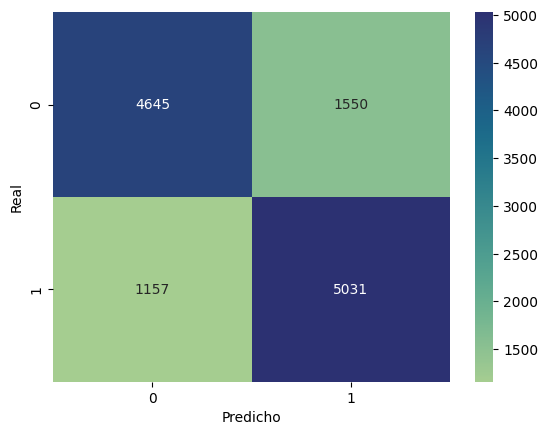

In [ ]:
y_pred_train_knn = knn.predict(x_val)
print(classification_report(y_val, y_pred_train_knn, digits=4))
grafico_matriz_confusion(y_val, y_pred_train_knn)

### SVM

#### Lineal

              precision    recall  f1-score   support

           0     0.8385    0.8157    0.8269      6195
           1     0.8204    0.8428    0.8314      6188

    accuracy                         0.8292     12383
   macro avg     0.8294    0.8292    0.8292     12383
weighted avg     0.8294    0.8292    0.8292     12383



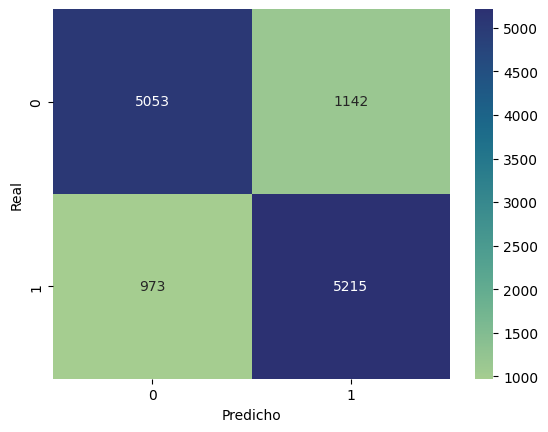

In [ ]:
y_pred_train_svm_lin = svm_lin.predict(x_val)
print(classification_report(y_val, y_pred_train_svm_lin, digits=4))
grafico_matriz_confusion(y_val, y_pred_train_svm_lin)

#### Polinómico

              precision    recall  f1-score   support

           0     0.8389    0.8147    0.8266      6195
           1     0.8197    0.8434    0.8314      6188

    accuracy                         0.8290     12383
   macro avg     0.8293    0.8290    0.8290     12383
weighted avg     0.8293    0.8290    0.8290     12383



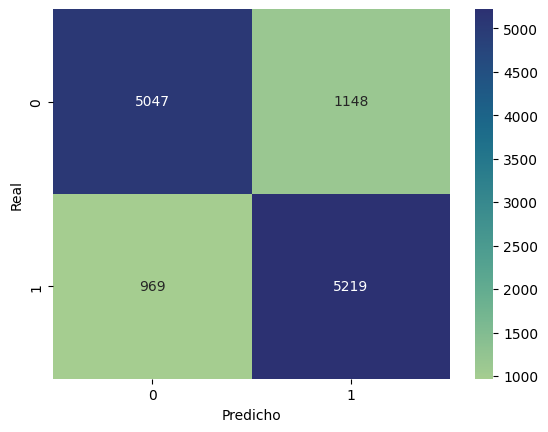

In [ ]:
y_pred_train_svm_pol = svm_pol.predict(x_val)
print(classification_report(y_val, y_pred_train_svm_pol, digits=4))
grafico_matriz_confusion(y_val, y_pred_train_svm_pol)

#### Radial

              precision    recall  f1-score   support

           0     0.8311    0.8291    0.8301      6195
           1     0.8293    0.8313    0.8303      6188

    accuracy                         0.8302     12383
   macro avg     0.8302    0.8302    0.8302     12383
weighted avg     0.8302    0.8302    0.8302     12383



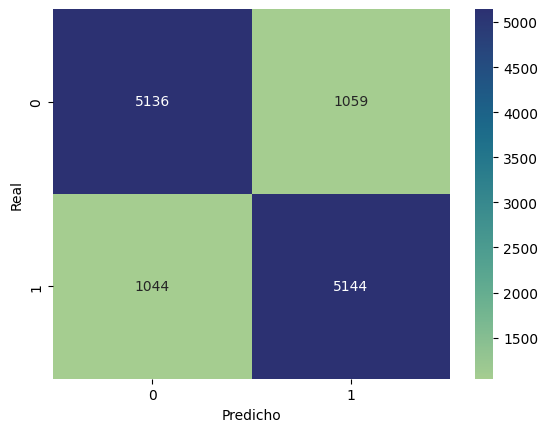

In [ ]:
y_pred_train_svm_rbf = svm_rbf.predict(x_val)
print(classification_report(y_val, y_pred_train_svm_rbf, digits=4))
grafico_matriz_confusion(y_val, y_pred_train_svm_rbf)

### RF

              precision    recall  f1-score   support

           0     0.8701    0.8901    0.8800      6195
           1     0.8874    0.8670    0.8771      6188

    accuracy                         0.8785     12383
   macro avg     0.8787    0.8785    0.8785     12383
weighted avg     0.8787    0.8785    0.8785     12383



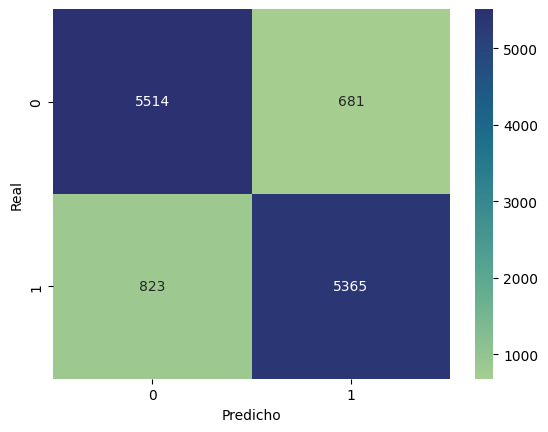

In [ ]:
y_pred_train_rf = rf.predict(x_val)
print(classification_report(y_val, y_pred_train_rf, digits=4))
grafico_matriz_confusion(y_val, y_pred_train_rf)

### XGBoost

              precision    recall  f1-score   support

           0     0.8862    0.8765    0.8814      6195
           1     0.8777    0.8874    0.8825      6188

    accuracy                         0.8819     12383
   macro avg     0.8820    0.8819    0.8819     12383
weighted avg     0.8820    0.8819    0.8819     12383



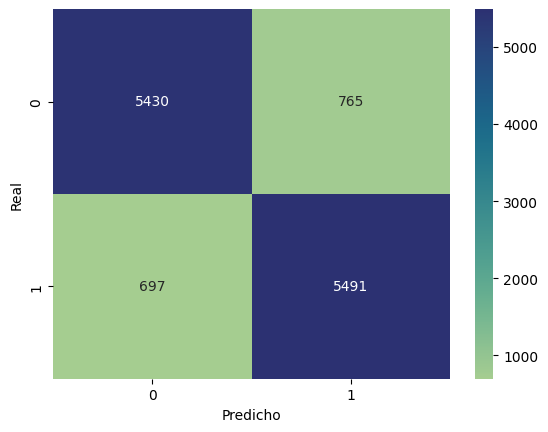

In [ ]:
y_pred_train_xgb = xgb.predict(x_val)
print(classification_report(y_val, y_pred_train_xgb, digits=4))
grafico_matriz_confusion(y_val, y_pred_train_xgb)

### Voting

              precision    recall  f1-score   support

           0     0.8923    0.8785    0.8853      6195
           1     0.8802    0.8938    0.8869      6188

    accuracy                         0.8861     12383
   macro avg     0.8862    0.8861    0.8861     12383
weighted avg     0.8862    0.8861    0.8861     12383



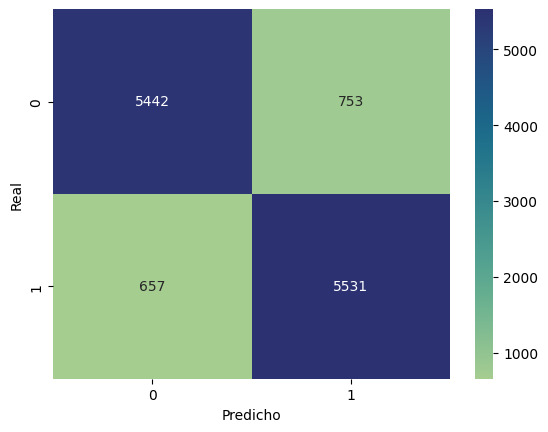

In [ ]:
y_pred_train_voting = voting_clf.predict(x_val)
print(classification_report(y_val, y_pred_train_voting, digits=4))
grafico_matriz_confusion(y_val, y_pred_train_voting)

### Stacking

              precision    recall  f1-score   support

           0     0.8909    0.8780    0.8844      6195
           1     0.8796    0.8924    0.8859      6188

    accuracy                         0.8852     12383
   macro avg     0.8852    0.8852    0.8852     12383
weighted avg     0.8852    0.8852    0.8852     12383



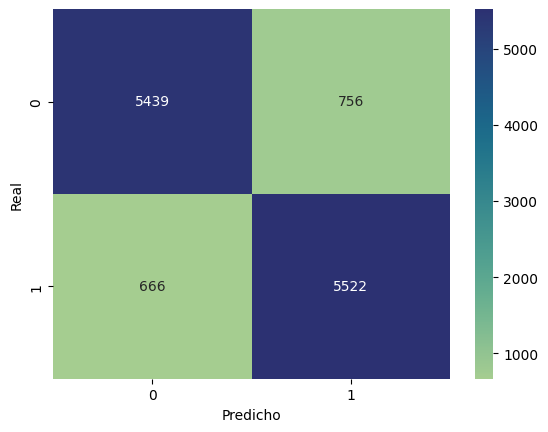

In [ ]:
y_pred_train_stacking = stacking_clf.predict(x_val)
print(classification_report(y_val, y_pred_train_stacking, digits=4))
grafico_matriz_confusion(y_val, y_pred_train_stacking)

## **g) Generación de predicciones con el conjunto de test para realizar los submits correspondientes en la competencia de Kaggle**

### KNN

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_knn, average='weighted')
predecir_y_exportar_a_csv_con_knn(knn, df_test_completo, f1_score_en_train)

### SVM

#### Lineal

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_svm_lin, average='weighted')
predecir_y_exportar_a_csv_con_svm_lineal(svm_lin, df_test_completo, f1_score_en_train)

#### Polinómico

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_svm_pol, average='weighted')
predecir_y_exportar_a_csv_con_svm_polinomico(svm_pol, df_test_completo, f1_score_en_train)

#### Radial

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_svm_rbf, average='weighted')
predecir_y_exportar_a_csv_con_svm_radial(svm_rbf, df_test_completo, f1_score_en_train)

### RF

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_rf, average='weighted')
predecir_y_exportar_a_csv_con_rf(rf, df_test_completo, f1_score_en_train)

### XGBoost

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_xgb, average='weighted')
predecir_y_exportar_a_csv_con_xgb(xgb, df_test_completo, f1_score_en_train)

### Voting

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_voting, average='weighted')
predecir_y_exportar_a_csv_con_voting(voting_clf, df_test_completo, f1_score_en_train)

### Stacking

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train_stacking, average='weighted')
predecir_y_exportar_a_csv_con_stacking(stacking_clf, df_test_completo, f1_score_en_train)